# Breast cancer classification

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dataset
Wisconsin Breast Cancer Dataset (WBCD) of the FNA biopsy system.
The following code snippet loads the data from a .csv file, shows the shape of the dataset and the dataset head.

In [67]:
data = pd.read_csv('data.csv')

print(f'Dataset contains {data.shape[0]} examples, each containing {data.shape[1]} features.')
pd.set_option('display.max_colwidth', None, "display.max_rows", None, 'display.max_columns', None)
display(data.head())

Dataset contains 569 examples, each containing 32 features.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dataset information and description

Code block below provides the data types for all features and counts the non-null entries.
The descriptive statistics of the dataset:

- **Count:** The number of non-null values in the column.

- **Mean:** The average value of the data in the column.

- **Standard Deviation (std):** A measure of how spread out the data is. It quantifies the amount of variation or dispersion in the data.

- **Minimum (min):** The smallest value in the column.

- **25th Percentile (25%):** The value below which 25% of the data falls. This is also known as the first quartile.

- **50th Percentile (50%):** The median or middle value in the column. This is also known as the second quartile.

- **75th Percentile (75%):** The value below which 75% of the data falls. This is also known as the third quartile.

- **Maximum (max):** The largest value in the column.


In [68]:
print(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Outliers
### a) IQR

Following code block shows the outliers in the dataset using the 1.5 IQR method

In [69]:
def find_outliers(data, method='iqr', threshold=1.5):
    outlier_info = []
    for column_name in data.select_dtypes(include=['float']):
        if method == 'iqr':
            Q1 = data[column_name].quantile(0.25)
            Q3 = data[column_name].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
        elif method == 'z-score':
            z_scores = np.abs((data[column_name] - data[column_name].mean()) / data[column_name].std())
            outliers = data[z_scores > threshold]
        else:
            raise ValueError("Invalid method. Use 'iqr' or 'z-score'.")

        if not outliers.empty:
            column_mean = data[column_name].mean()
            column_mode = data[column_name].mode().iloc[0]
            outlier_info.append(pd.DataFrame({
                'Column Name': [column_name],
                'Mean': [column_mean],
                'Mode': [column_mode],
                'Outliers': [outliers[column_name].values],
            }))

    if outlier_info:
        return pd.concat(outlier_info, ignore_index=True)
    else:
        return None


outlier_info_iqr = find_outliers(data, method='iqr')
if outlier_info_iqr is not None:
    display(outlier_info_iqr)



,Column Name,Mean,Mode,Outliers
0,radius_mean,14.127292,12.340000,"[25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51, 25.73, 22.01, 27.42, 23.09, 24.63]"
1,texture_mean,19.289649,14.930000,"[32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62]"
2,perimeter_mean,91.969033,82.610000,"[171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188.5, 153.5, 155.1, 174.2, 186.9, 152.1, 165.5]"
3,area_mean,654.889104,512.200000,"[1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0, 1685.0, 2499.0, 1670.0, 1364.0, 1419.0, 1491.0, 1747.0, 2010.0, 1546.0, 1482.0, 1386.0, 1335.0, 1407.0, 1384.0, 2501.0, 1682.0, 1841.0, 1347.0, 1479.0]"
4,smoothness_mean,0.096360,0.100700,"[0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.05263]"
5,compactness_mean,0.104341,0.114700,"[0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.3454, 0.2665, 0.2768, 0.2867, 0.2832, 0.2413, 0.3114, 0.2364, 0.2363, 0.2576, 0.277]"
6,concavity_mean,0.088799,0.000000,"[0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003, 0.4268, 0.4108, 0.2871, 0.3523, 0.3201, 0.3176, 0.2914, 0.3368, 0.3189, 0.3635, 0.3174, 0.3514]"
7,concave points_mean,0.048919,0.000000,"[0.1604, 0.1845, 0.1823, 0.2012, 0.1878, 0.162, 0.1595, 0.1913, 0.1562, 0.1689]"
8,symmetry_mean,0.181162,0.160100,"[0.2597, 0.2521, 0.304, 0.2743, 0.2906, 0.2556, 0.2655, 0.2678, 0.254, 0.2548, 0.2495, 0.2595, 0.2569, 0.2538, 0.106]"
9,fractal_dimension_mean,0.062798,0.056670,"[0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0.08261, 0.09296, 0.08116, 0.08104, 0.08743, 0.0845, 0.0795, 0.09502, 0.09575, 0.07976]"


### b) Z-Scores

In [70]:
outlier_info_z_score = find_outliers(data, method='z-score', threshold=3)
if outlier_info_z_score is not None:
    display(outlier_info_z_score)

,Column Name,Mean,Mode,Outliers
0,radius_mean,14.127292,12.340000,"[25.22, 27.22, 28.11, 25.73, 27.42]"
1,texture_mean,19.289649,14.930000,"[32.47, 33.81, 39.28, 33.56]"
2,perimeter_mean,91.969033,82.610000,"[171.5, 166.2, 182.1, 188.5, 174.2, 186.9, 165.5]"
3,area_mean,654.889104,512.200000,"[1878.0, 1761.0, 2250.0, 2499.0, 1747.0, 2010.0, 2501.0, 1841.0]"
4,smoothness_mean,0.096360,0.100700,"[0.1425, 0.1398, 0.1447, 0.1634, 0.05263]"
5,compactness_mean,0.104341,0.114700,"[0.2776, 0.2839, 0.3454, 0.2665, 0.2768, 0.2867, 0.2832, 0.3114, 0.277]"
6,concavity_mean,0.088799,0.000000,"[0.3754, 0.3339, 0.4264, 0.4268, 0.4108, 0.3523, 0.3368, 0.3635, 0.3514]"
7,concave points_mean,0.048919,0.000000,"[0.1845, 0.1823, 0.2012, 0.1878, 0.1913, 0.1689]"
8,symmetry_mean,0.181162,0.160100,"[0.304, 0.2743, 0.2906, 0.2655, 0.2678]"
9,fractal_dimension_mean,0.062798,0.056670,"[0.09744, 0.0898, 0.09296, 0.08743, 0.0845, 0.09502, 0.09575]"


## Data visualization
### a) Malignant-Benign ratio

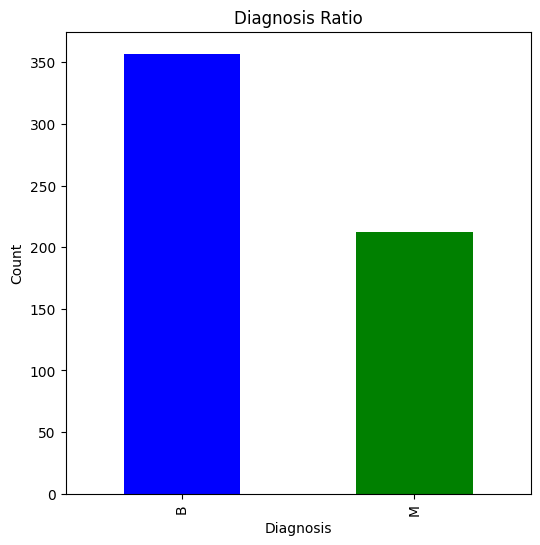

In [71]:
diagnosis_counts = data['diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
diagnosis_counts.plot(kind='bar', color=['b', 'g'])
plt.title('Diagnosis Ratio')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

### b) Diagnosis depending on the radius mean and concavity

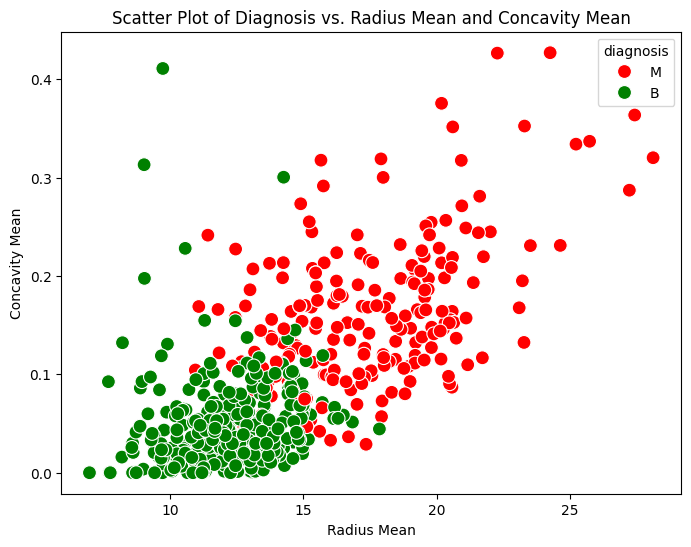

In [72]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='radius_mean', y='concavity_mean', data=data, hue='diagnosis', palette={'M': 'red', 'B': 'green'}, s=100)
plt.title('Scatter Plot of Diagnosis vs. Radius Mean and Concavity Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Concavity Mean')
plt.show()

### c) Area frequency histogram

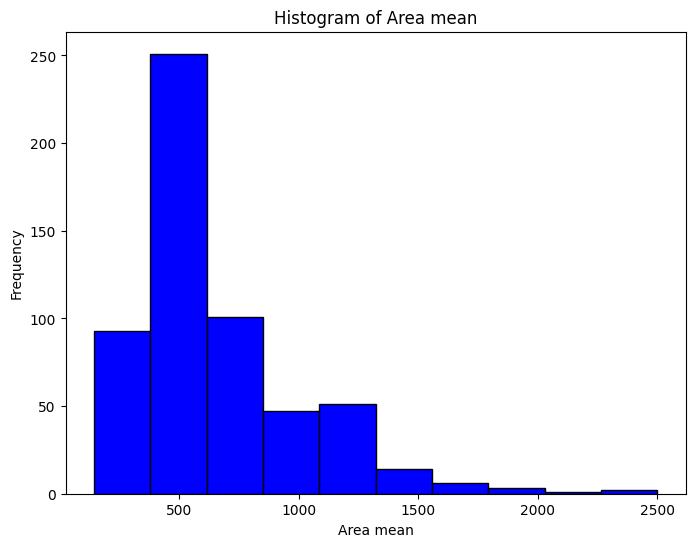

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(data['area_mean'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Area mean')
plt.xlabel('Area mean')
plt.ylabel('Frequency')
plt.show()

### d) Compactness mean box-plot
1.5 IQR outlier borders

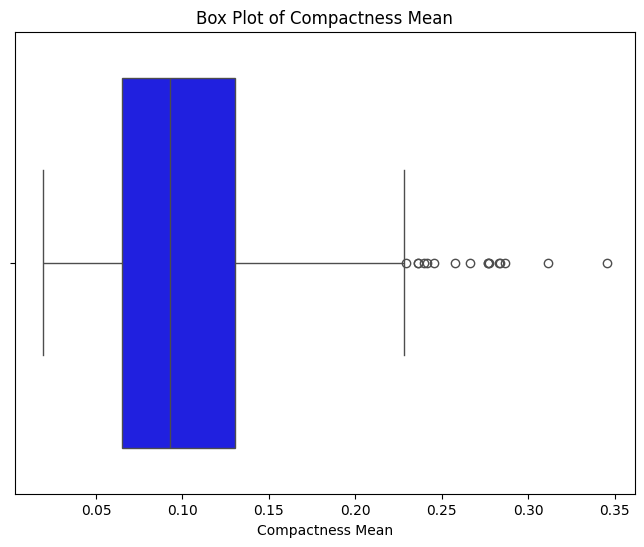

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['compactness_mean'], color='blue')
plt.title('Box Plot of Compactness Mean')
plt.xlabel('Compactness Mean')
plt.show()

### e) Correlation heatmap for means

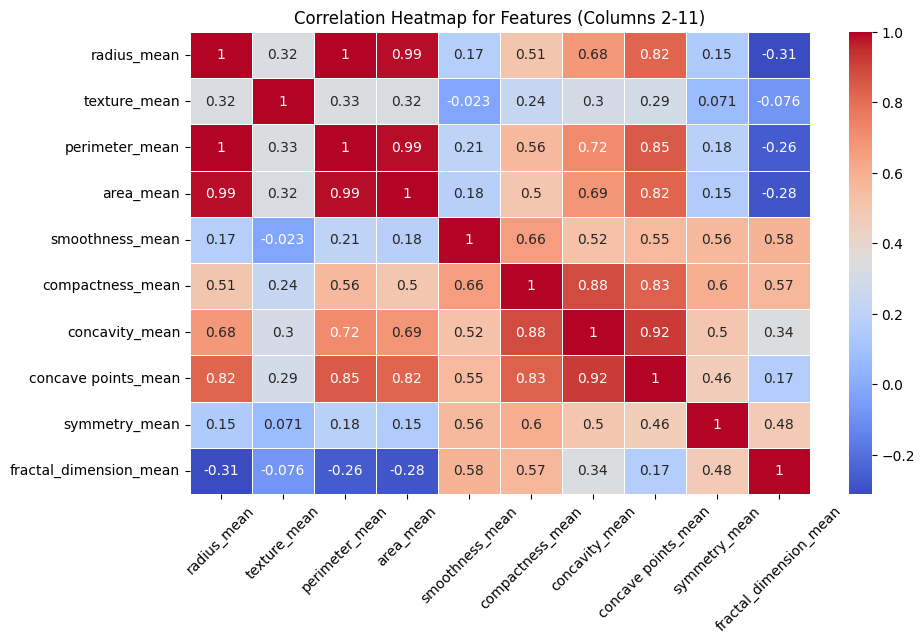

In [75]:
correlation_matrix = data.iloc[:, 2:12].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Features (Columns 2-11)')
plt.xticks(rotation=45)
plt.show()

## Outlier removal

In [76]:
def remove_rows_with_outliers(data, method='iqr', threshold=2.0):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

    if method == 'iqr':
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        no_outliers = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]
    elif method == 'zscore':
        z_scores = np.abs((numeric_data - numeric_data.mean()) / numeric_data.std())
        no_outliers = data[~(z_scores > threshold).any(axis=1)]
    else:
        raise ValueError("Invalid method. Use 'iqr' or 'zscore'.")

    return no_outliers
data_no_outliers = remove_rows_with_outliers(data)
display(data_no_outliers)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
10,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,0.3795,1.1870,2.4660,40.510,0.004029,0.009269,0.011010,0.007591,0.014600,0.003042,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.145900,0.099750,0.2948,0.08452
13,846381,M,15.850,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,0.1847,0.05338,0.4033,1.0780,2.9030,36.580,0.009769,0.031260,0.050510,0.019920,0.029810,0.003002,16.840,27.66,112.00,876.5,0.11310,0.19240,0.232200,0.111900,0.2809,0.06287
16,848406,M,14.680,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,0.4727,1.2400,3.1950,45.400,0.005718,0.011620,0.019980,0.011090,0.014100,0.002085,19.070,30.88,123.40,1138.0,0.14640,0.18710,0.291400,0.160900,0.3029,0.08216
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,0.2699,0.7886,2.0580,23.560,0.008462,0.014600,0.023870,0.013150,0.019800,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.128800,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,0.1852,0.7477,1.3830,14.670,0.004097,0.018980,0.016980,0.006490,0.016780,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.072830,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,0.2773,0.9768,1.9090,15.700,0.009606,0.014320,0.019850,0.014210,0.020270,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.062270,0.2450,0.07773


## Feature selection

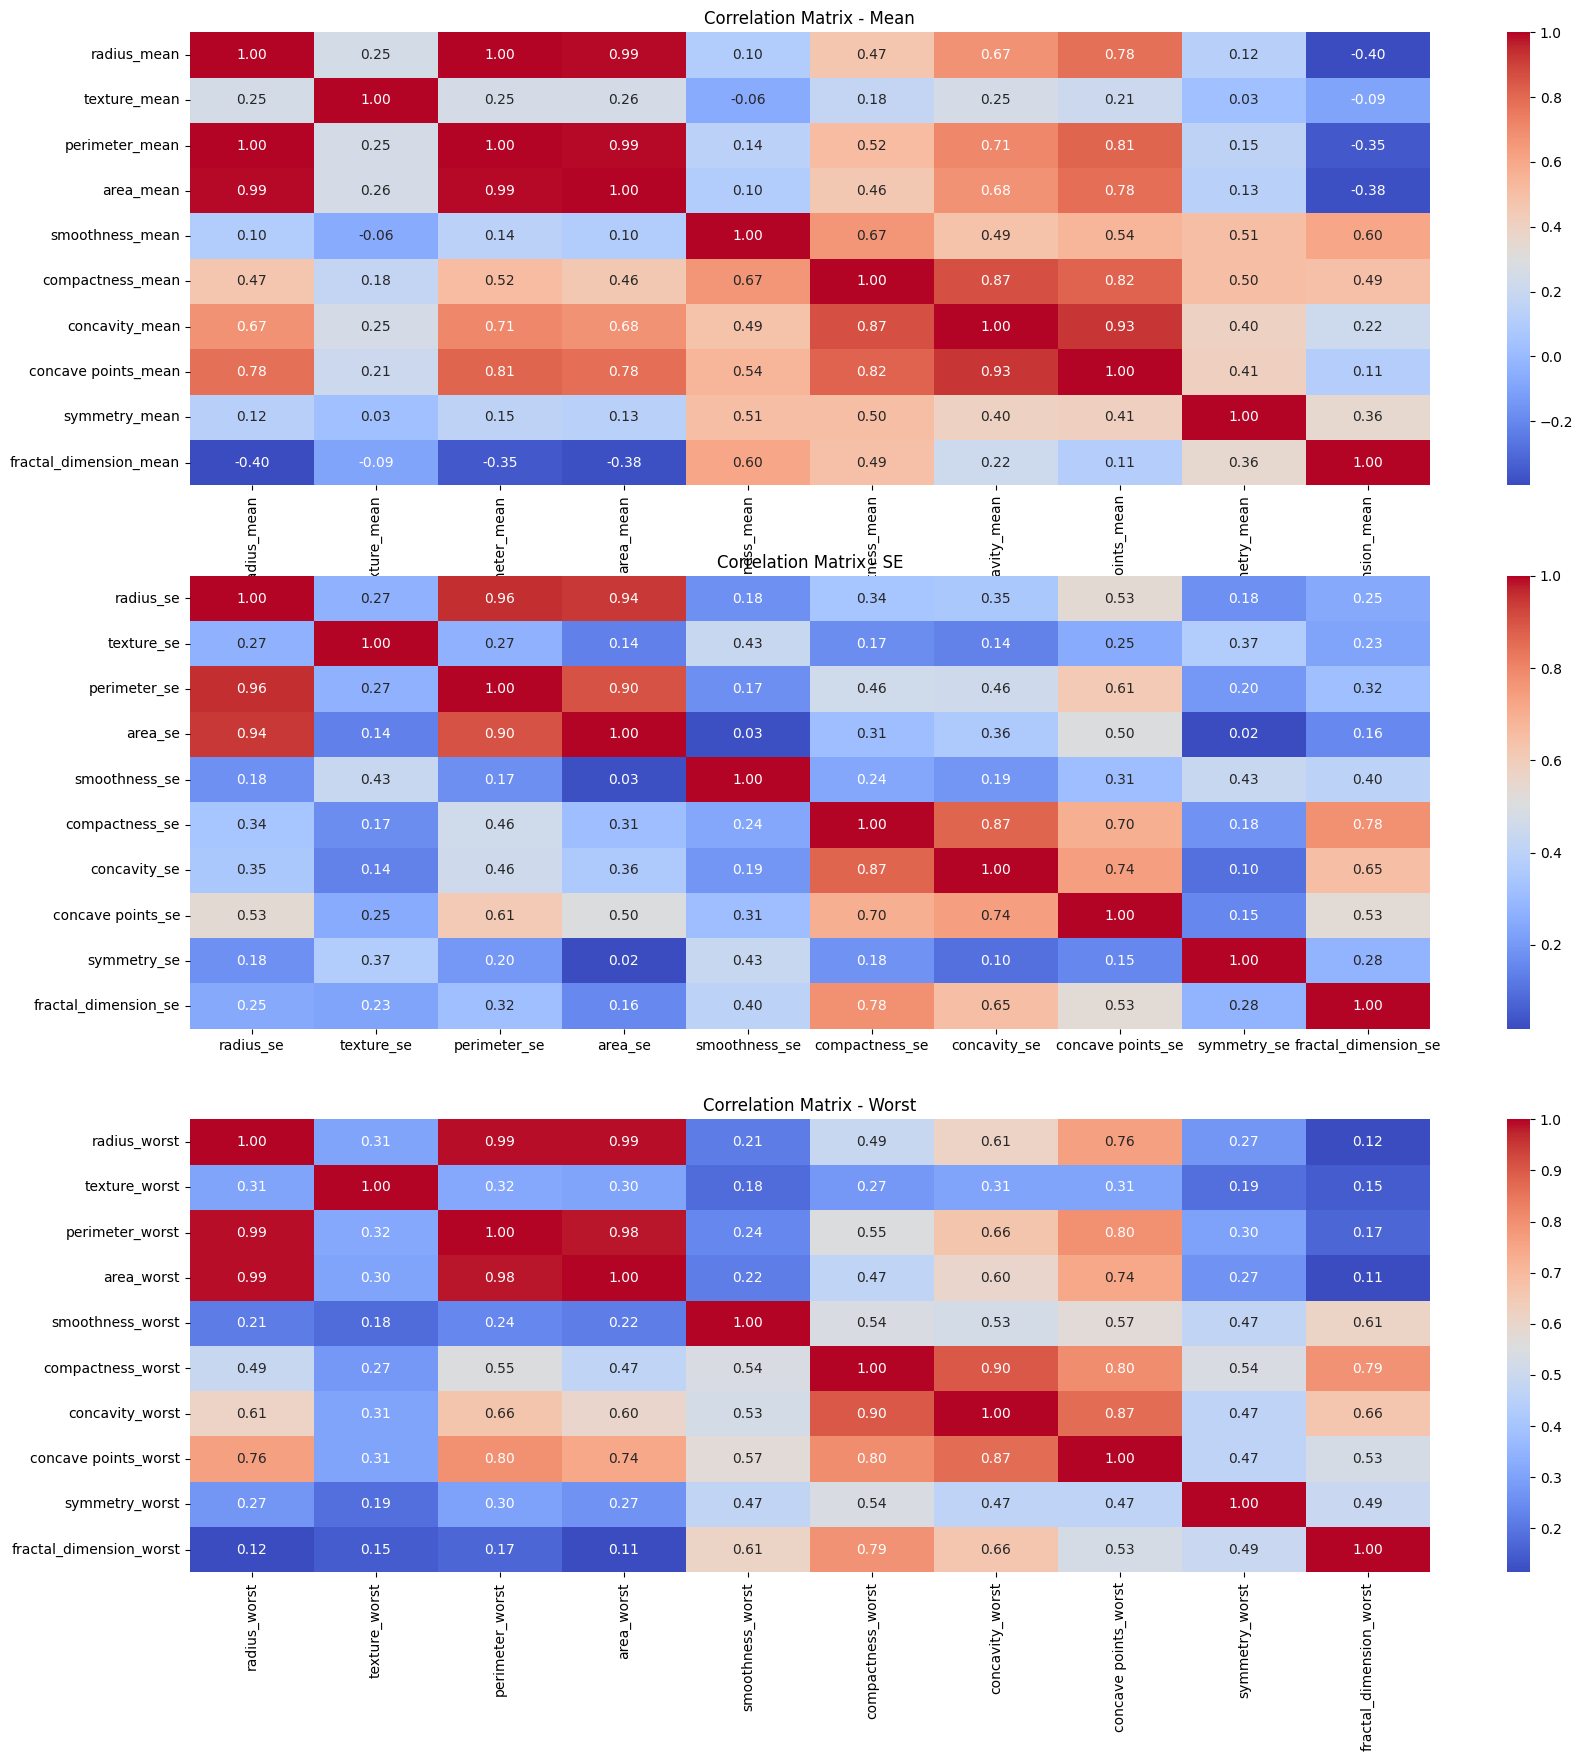

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst
1,20.570,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.013080,0.013890,24.990,23.41,0.12380,0.18660,0.2750
5,12.450,15.70,0.12780,0.17000,0.2087,0.07613,0.3345,0.8902,0.007510,0.033450,0.021650,15.470,23.75,0.17910,0.52490,0.3985
6,18.250,19.98,0.09463,0.10900,0.1794,0.05742,0.4467,0.7732,0.004314,0.013820,0.013690,22.880,27.66,0.14420,0.25760,0.3063
8,13.000,21.82,0.12730,0.19320,0.2350,0.07389,0.3063,1.0020,0.005731,0.035020,0.021430,15.490,30.73,0.17030,0.54010,0.4378
10,16.020,23.24,0.08206,0.06669,0.1528,0.05697,0.3795,1.1870,0.004029,0.009269,0.014600,19.190,33.88,0.11810,0.15510,0.2948
13,15.850,23.95,0.08401,0.10020,0.1847,0.05338,0.4033,1.0780,0.009769,0.031260,0.029810,16.840,27.66,0.11310,0.19240,0.2809
16,14.680,20.13,0.09867,0.07200,0.1586,0.05922,0.4727,1.2400,0.005718,0.011620,0.014100,19.070,30.88,0.14640,0.18710,0.3029
19,13.540,14.36,0.09779,0.08129,0.1885,0.05766,0.2699,0.7886,0.008462,0.014600,0.019800,15.110,19.26,0.14400,0.17730,0.2977
20,13.080,15.71,0.10750,0.12700,0.1967,0.06811,0.1852,0.7477,0.004097,0.018980,0.016780,14.500,20.49,0.13120,0.27760,0.3184
21,9.504,12.44,0.10240,0.06492,0.1815,0.06905,0.2773,0.9768,0.009606,0.014320,0.020270,10.230,15.66,0.13240,0.11480,0.2450


In [77]:
mean_data = data_no_outliers.select_dtypes(include=['number']).filter(like='_mean')
se_data = data_no_outliers.select_dtypes(include=['number']).filter(like='_se')
worst_data = data_no_outliers.select_dtypes(include=['number']).filter(like='_worst')

# Create separate correlation matrices for 'mean', 'se', and 'worst' subsets
correlation_matrix_mean = mean_data.corr()
correlation_matrix_se = se_data.corr()
correlation_matrix_worst = worst_data.corr()

fig, axes = plt.subplots(3, 1, figsize=(20, 20))

sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix - Mean")

sns.heatmap(correlation_matrix_se, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix - SE")

sns.heatmap(correlation_matrix_worst, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2])
axes[2].set_title("Correlation Matrix - Worst")

plt.show()

threshold = 0.7

correlated_features_mean = set()
correlated_features_se = set()
correlated_features_worst = set()

def find_correlated_features(correlation_matrix, threshold, correlated_features):
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)


find_correlated_features(correlation_matrix_mean, threshold, correlated_features_mean)
find_correlated_features(correlation_matrix_se, threshold, correlated_features_se)
find_correlated_features(correlation_matrix_worst, threshold, correlated_features_worst)

data_no_correlation_mean = mean_data.drop(correlated_features_mean, axis=1)
data_no_correlation_se = se_data.drop(correlated_features_se, axis=1)
data_no_correlation_worst = worst_data.drop(correlated_features_worst, axis=1)

data_no_correlation = pd.concat([data_no_correlation_mean, data_no_correlation_se, data_no_correlation_worst], axis=1)

display(data_no_correlation)

# Result replication

## Replication of the dataset used in the paper

Original paper dropped "fractal_dimension_mean", "texture_se", "symmetry_se" and "id columns so in order to replicate the results as good as it is possible the same columns are dropped in this replication of results as well.

Dataset is also split into train and test subsets.

In [78]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

replication_dataset = data.drop(["fractal_dimension_mean", "texture_se", "symmetry_se", "id"], axis=1)
X = replication_dataset.drop('diagnosis', axis=1)
y = replication_dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=13)
acc_table_tr, acc_table_ts = [], []

## Unoptimised Logistic regression

This is a direct replication of the method used in the original paper. The original paper states 99.1% training accuracy and a 94.4% testing
accuracy. While my implementation achieves 94.8% training and 93.0% testing accuracy. The discrepancy probably originates from the hardware differences and random sampling of the dataset in to the train and test subsets.


Accuracy score of logistic regression prediction on training data 0.9483568075117371
Accuracy score of logistic regression prediction on test data 0.9300699300699301


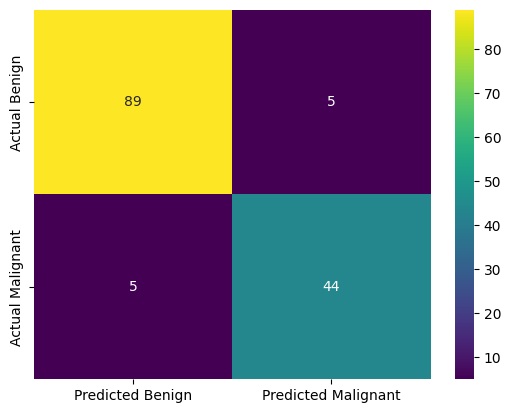

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.95      0.95        94
   Malignant       0.90      0.90      0.90        49

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



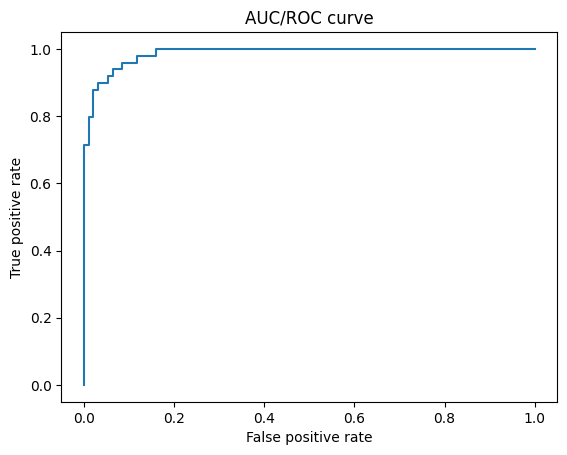

In [79]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
print(f'Accuracy score of logistic regression prediction on training data {accuracy_score(y_train, y_pred_tr)}')
acc_table_tr.append(accuracy_score(y_train, y_pred_tr))
y_pred = lr.predict(X_test)
print(f'Accuracy score of logistic regression prediction on test data {accuracy_score(y_test, y_pred)}')
acc_table_ts.append(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(classification_rep)

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("AUC/ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

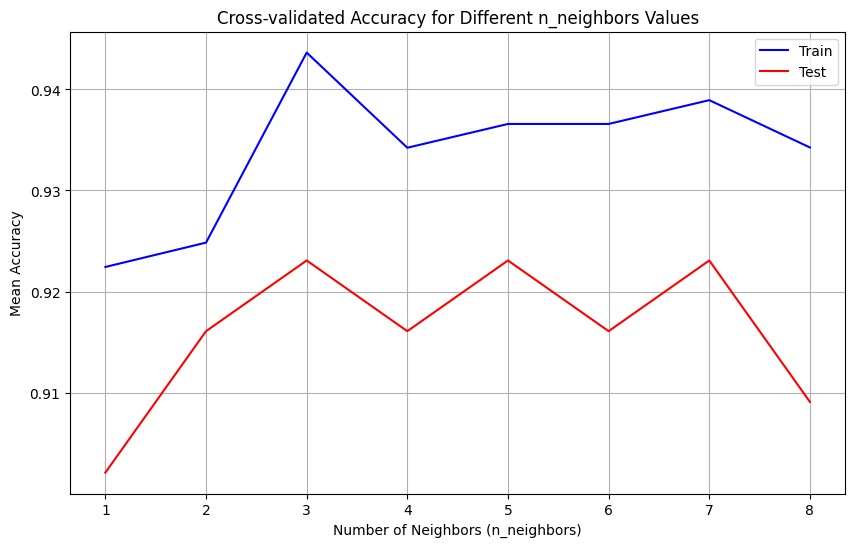

Best n_neighbors for test set: 3


In [80]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors_values = range(1, 9)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

mean_scores_train = []
mean_scores_test = []

best_k = None
best_score = 0.0

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    cv_scores_train = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    mean_scores_train.append(cv_scores_train.mean())

    knn.fit(X_train, y_train)

    y_pred_test = knn.predict(X_test)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    mean_scores_test.append(accuracy_test)

    if accuracy_test > best_score:
        best_score = accuracy_test
        best_k = n_neighbors

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mean_scores_train, color='b', label='Train')
plt.plot(n_neighbors_values, mean_scores_test, color='r', label='Test')
plt.title('Cross-validated Accuracy for Different n_neighbors Values')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best n_neighbors for test set: {best_k}")

## Unoptimised KNN

Accuracy score of unoptimised KNeighborsClassifier prediction on training data 0.9084507042253521
Accuracy score of unoptimised KNeighborsClassifier prediction on test data 0.9090909090909091


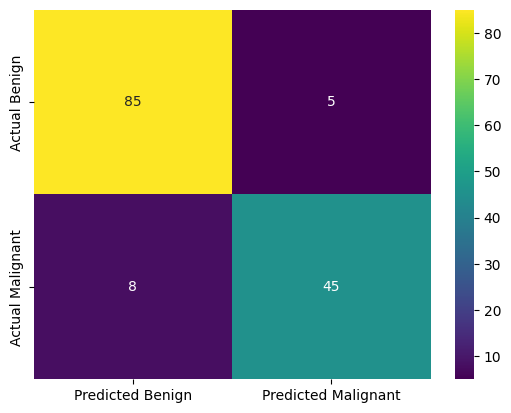

Classification Report:
              precision    recall  f1-score   support

      Benign       0.91      0.94      0.93        90
   Malignant       0.90      0.85      0.87        53

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



In [107]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_tr = knn.predict(X_train)
print(f'Accuracy score of unoptimised KNeighborsClassifier prediction on training data {accuracy_score(y_train, y_pred_tr)}')
acc_table_tr.append(accuracy_score(y_train, y_pred_tr))
y_pred = knn.predict(X_test)
print(f'Accuracy score of unoptimised KNeighborsClassifier prediction on test data {accuracy_score(y_test, y_pred)}')
acc_table_ts.append(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(classification_rep)

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("AUC/ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

## SVM

The SVM used in my implementation uses the RBF kernel and C = 1.0. I achieved 92.9% accuracy on the training data and 88.8% accuracy on the test data. The original paper concluded that SVM is the best performing method which I could not achieve with default settings, which leads me to believe that original paper probably utilized some optimization methods to find the best C, gamma and possibly even used another kernel. 

Accuracy score of SVM prediction on training data 0.9295774647887324
Accuracy score of SVM prediction on test data 0.8881118881118881


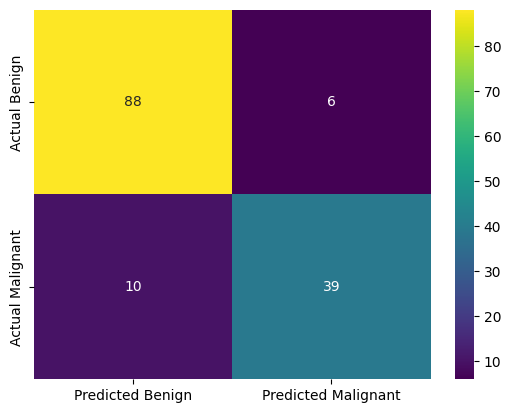

Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.94      0.92        94
   Malignant       0.87      0.80      0.83        49

    accuracy                           0.89       143
   macro avg       0.88      0.87      0.87       143
weighted avg       0.89      0.89      0.89       143



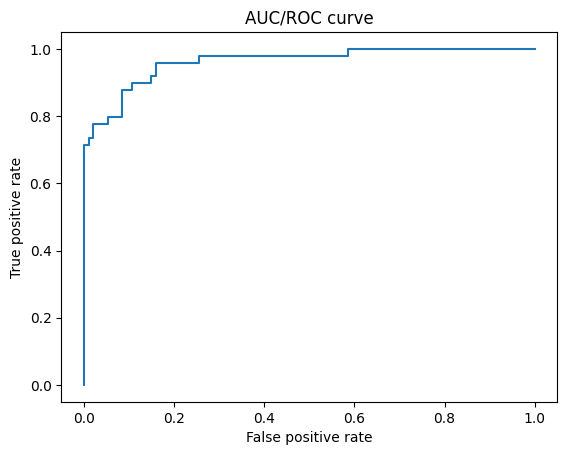

In [82]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(X_train, y_train)

y_pred_tr = svm.predict(X_train)
print(f'Accuracy score of SVM prediction on training data {accuracy_score(y_train, y_pred_tr)}')
acc_table_tr.append(accuracy_score(y_train, y_pred_tr))
y_pred = svm.predict(X_test)
print(f'Accuracy score of SVM prediction on test data {accuracy_score(y_test, y_pred)}')
acc_table_ts.append(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(classification_rep)

y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("AUC/ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

## Decision tree

Decision tree gets 100% accuracy on the train set both in my replication and in the original implementation which makes me sure that the max_depth parameter wasn't set in the original implementation. However, the 91.6% accuracy I got on the test data leads me to believe that the model is over fitted, and could benefit from limiting the maximum depth. Original research reached 95.8% accuracy on the test set.

Accuracy score of Decision Tree Classifier prediction on training data 1.0
Accuracy score of Decision Tree Classifier prediction on test data 0.9230769230769231


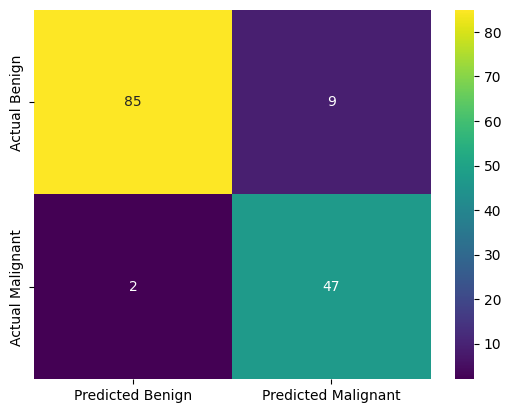

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.90      0.94        94
   Malignant       0.84      0.96      0.90        49

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



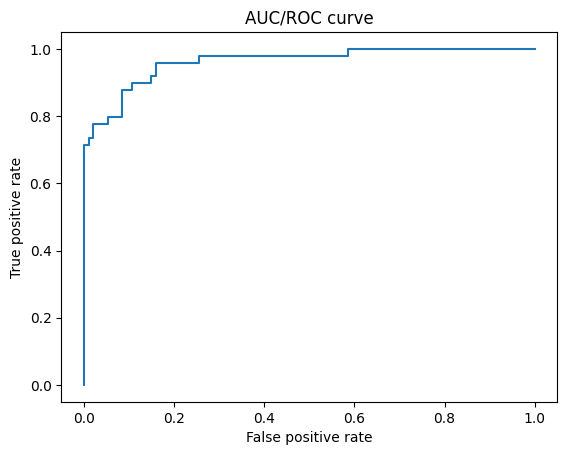

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred_tr = dtc.predict(X_train)
print(f'Accuracy score of Decision Tree Classifier prediction on training data {accuracy_score(y_train, y_pred_tr)}')
acc_table_tr.append(accuracy_score(y_train, y_pred_tr))
y_pred = dtc.predict(X_test)
print(f'Accuracy score of Decision Tree Classifier prediction on test data {accuracy_score(y_test, y_pred)}')
acc_table_ts.append(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(classification_rep)

y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("AUC/ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

## Random forrest classification

Random forrest uses multiple decision trees to reach the classification decision, so it isn't surprising that my model reached a 100% accuracy on the training set. The original implementation reached 99.5% accuracy on the training set, while the accuracy of that model on the test set is 96.5%. As my implementation reaches 93.0% accuracy on the test set, I believe that there is a significant possibility I over fit the model by not limiting the max depth.  

Accuracy score of Random Forest classifier prediction on training data 1.0
Accuracy score of Random Forest classifier prediction on test data 0.9440559440559441


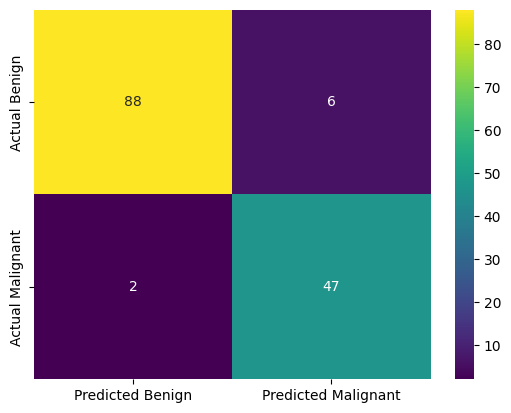

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96        94
   Malignant       0.89      0.96      0.92        49

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



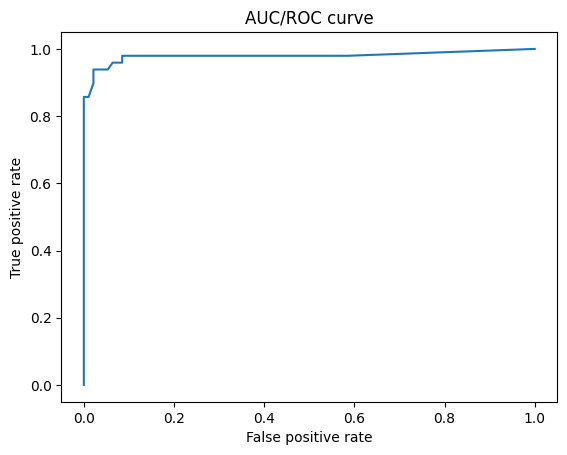

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred_tr = rfc.predict(X_train)
print(f'Accuracy score of Random Forest classifier prediction on training data {accuracy_score(y_train, y_pred_tr)}')
acc_table_tr.append(accuracy_score(y_train, y_pred_tr))
y_pred = rfc.predict(X_test)
print(f'Accuracy score of Random Forest classifier prediction on test data {accuracy_score(y_test, y_pred)}')
acc_table_ts.append(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(classification_rep)

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("AUC/ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

## Naive Bayes

The results I got using the Gaussian Naive Bayes classifier are in accordance with the original results, the difference is negligible.

Accuracy score of Naive Bayes classifier prediction on training data 0.9436619718309859
Accuracy score of Naive Bayes classifier prediction on test data 0.9300699300699301


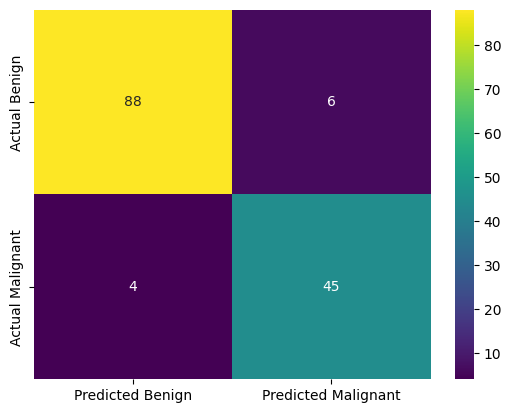

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.94      0.95        94
   Malignant       0.88      0.92      0.90        49

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.93      0.93       143



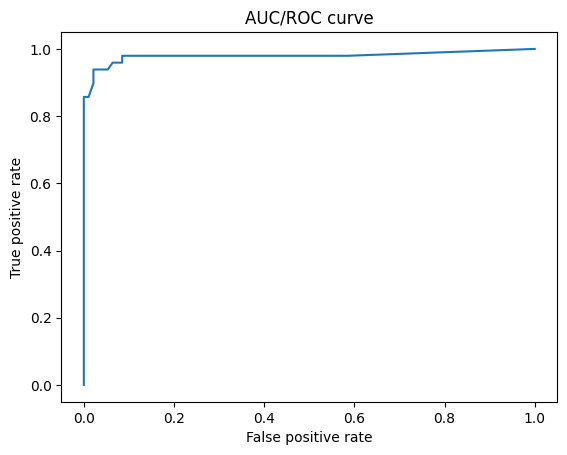

In [85]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred_tr = nb.predict(X_train)
print(f'Accuracy score of Naive Bayes classifier prediction on training data {accuracy_score(y_train, y_pred_tr)}')
acc_table_tr.append(accuracy_score(y_train, y_pred_tr))
y_pred = nb.predict(X_test)
print(f'Accuracy score of Naive Bayes classifier prediction on test data {accuracy_score(y_test, y_pred)}')
acc_table_ts.append(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(classification_rep)

y_pred_proba = rfc.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("AUC/ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()


## Accuracy score comparison table

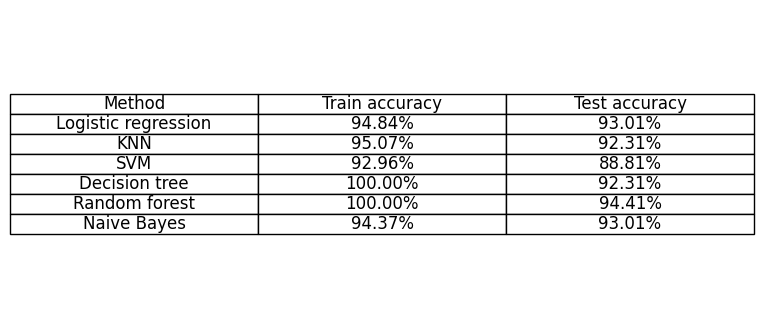

In [86]:
data = {
    'Method': ['Logistic regression', 'KNN', 'SVM', 'Decision tree', 'Random forest', 'Naive Bayes'],
    'Train accuracy': [f'{pc * 100:.2f}%' for pc in acc_table_tr],
    'Test accuracy': [f'{pc * 100:.2f}%' for pc in acc_table_ts]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2) 

plt.show()

# Improvements of the original work

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, hinge_loss, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [260]:
# processed data
X = pd.read_csv("processed_data.csv")
print("Processed dataset contains {} examples with {} features".format(X.shape[0], X.shape[1]))

y = X.iloc[:, 0]
X = X.drop(X.columns[0], axis=1)

X = X.values
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,  test_size=0.25, random_state=8, stratify=y)
accuracy_table_ts_proc = []

# for pca
X_for_pca = pd.read_csv("data.csv")
X_for_pca.drop(("id"), axis=1, inplace=True)
print("original dataset contains {} examples with {} features".format(X_for_pca.shape[0], X_for_pca.shape[1]))

y_for_pca = X_for_pca.iloc[:, 0]
X_for_pca = X_for_pca.drop(X_for_pca.columns[0], axis=1)

X_for_pca = X_for_pca.values
y_for_pca = y_for_pca.values.reshape(-1, 1)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_for_pca, y_for_pca, train_size=0.75,  test_size=0.25, random_state=8, stratify=y)
accuracy_table_ts_pca = []

Processed dataset contains 569 examples with 18 features
original dataset contains 569 examples with 31 features


# TODO Mata

In [261]:
#def plot_confusion_matrix(y_true, y_pred, positive_class="M", negative_class="B"):

## Feature engineering with PCA

The original paper manually reduced the number of features using a correlation matrix. Same was done in this notebook. 
Here an alternative approach is also considered. The number of features in the original dataset is reduced using PCA. This PCA dataset is then used for training and testing alongside the manually processed dataset that was created in part 1 using correlation matrices and non-PCA feature engineering (processed_data.csv).

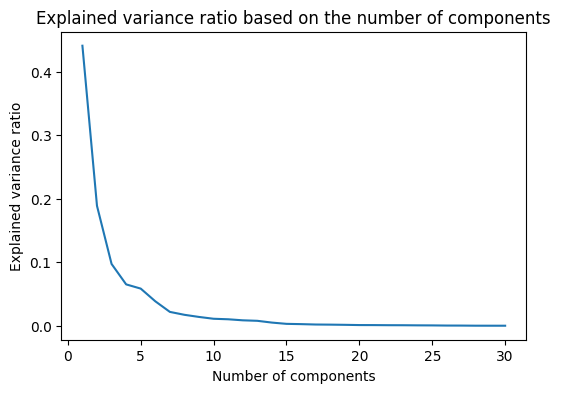

In [262]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

pca = PCA()
pca.fit(X_train_pca)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title("Explained variance ratio based on the number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.show()

The first 8 components explain 0.9281% of total variance


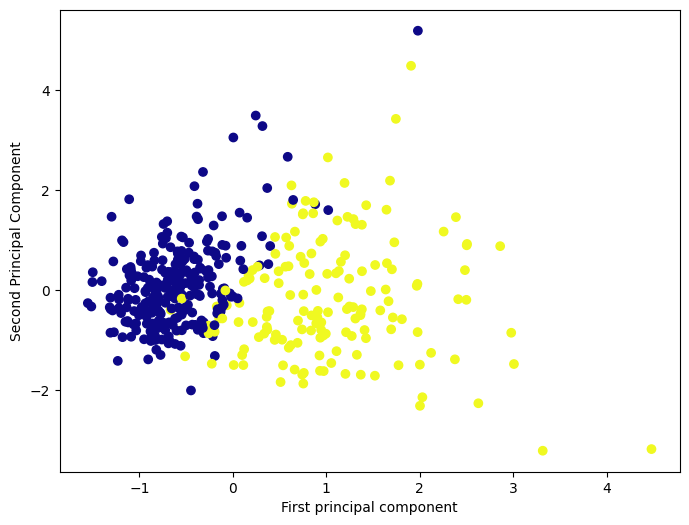

In [263]:
n=8
pca = PCA(n_components=n)
scaler = StandardScaler()

X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"The first {n} components explain {(cumulative_explained_variance[n-1]):.4f}% of total variance")

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=np.where(y_train_pca == "M", 1, 0), cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

## Logistic regression
### with Polynomial transformation of the training data
The original paper used the default implementation of logistic regression. In addition to replicating the results
this project also uses polynomial transformation of the dataset, cross-validates the hiperparameters and thus improves the precision of predictions on the test data for approximately 2.8%.

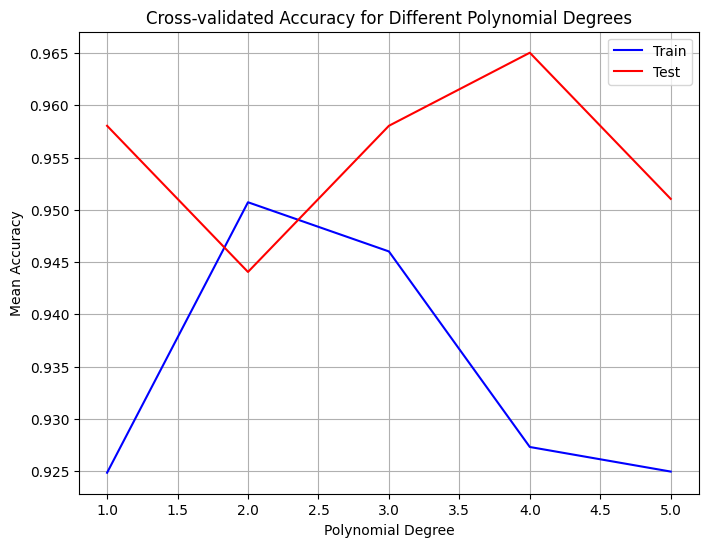

Best polynomial degree for test set: 4
Accuracy score of optimised logistic regression prediction on training data 0.960093896713615
Accuracy score of optimised logistic regression prediction on test data 0.965034965034965


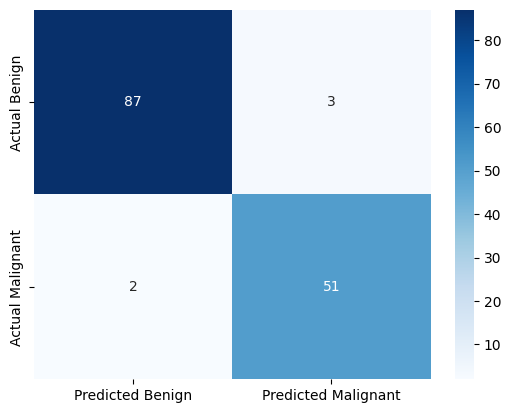

In [264]:
degree_values = range(1, 6)

lr = LogisticRegression()

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

mean_scores_train = []
mean_scores_test = []

best_degree = None
best_score = 0.0

for degree in degree_values:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    cv_scores_train = cross_val_score(lr, X_train_poly, y_train, cv=k_fold, scoring='accuracy')
    mean_scores_train.append(cv_scores_train.mean())

    lr.fit(X_train_poly, y_train)

    y_pred_test = lr.predict(X_test_poly)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    mean_scores_test.append(accuracy_test)

    if accuracy_test > best_score:
        best_score = accuracy_test
        best_degree = degree


plt.figure(figsize=(8, 6))
plt.plot(degree_values, mean_scores_train, color='b', label='Train')
plt.plot(degree_values, mean_scores_test, color='r', label='Test')
plt.title('Cross-validated Accuracy for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best polynomial degree for test set: {best_degree}")

lr = LogisticRegression()
lr.fit(PolynomialFeatures(degree=best_degree).fit_transform(X_train), y_train)

y_pred_tr = lr.predict(PolynomialFeatures(degree=best_degree).fit_transform(X_train))
acc_train = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy score of optimised logistic regression prediction on training data {acc_train}')

y_pred = lr.predict(PolynomialFeatures(degree=best_degree).fit_transform(X_test))
acc_test = accuracy_score(y_test, y_pred)
accuracy_table_ts_proc.append(acc_test)
print(f'Accuracy score of optimised logistic regression prediction on test data {acc_test}')

conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_lr = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True,
                         xticklabels=['Predicted Benign', 'Predicted Malignant'],
                         yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

## K-nearest neighbours
### with K hiperparameter cross-validation

KNN algorithm used here is slightly optimised by cross-validating the n_neighbors parameter. Thus achieving 93.2% training accuracy and 96.5% testing accuracy. In comparison, unoptimised KNN achieves 95.0% and 92.3% respectively.
The original paper achieved 97.6% training, and 95.8% test accuracy, as before I conclude that there is no significant difference in performance between my implementation and the original implementations. The small dataset also causes the differences to look more significant than they actually are, as even a 1 or 2 differently classified examples cause a significant difference in two testing accuracies.

Accuracy score of KNN prediction on training data 0.9389671361502347
Accuracy score of KNN prediction on test data 0.965034965034965


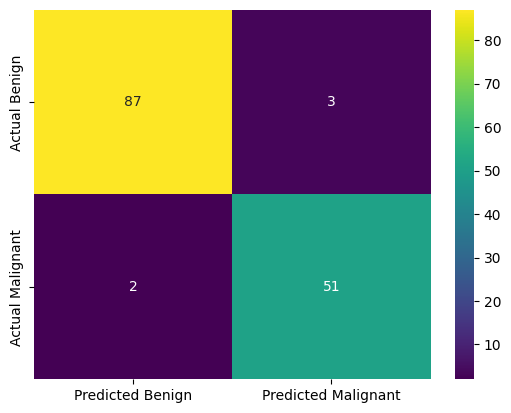

In [265]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred_tr = knn.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy score of KNN prediction on training data {acc_train}')

acc_test = accuracy_score(y_test, y_pred)
accuracy_table_ts_proc.append(acc_test)
print(f'Accuracy score of KNN prediction on test data {acc_test}')


conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

cm_heatmap_knn = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                         xticklabels=['Predicted Benign', 'Predicted Malignant'],
                         yticklabels=['Actual Benign', 'Actual Malignant'])

plt.show()

## Random Forrest classifier with maximum depth hyperparameter optimisation

During the optimisation of the Random Forrest Classifier GridSearch was used to optimize three hyperparameters: number of estimators, maximum depth of each estimator and the bootstrap mode(if True data is bootstrapped).

First a Randomized search was conducted to "ballpark" the approximate values, and then a grid search refined the results.

This achieved a 95.8% test accuracy, a 1.4% improvement.

Accuracy score of Random Forest classifier prediction on training data: 1.0
Accuracy score of Random Forest classifier prediction on test data: 0.951048951048951
Optimal max_depth: None
Optimal n_estimators: 135
Optimal bootstrap mode: False


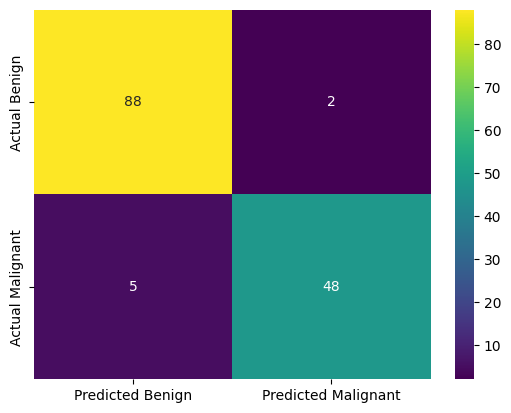

In [266]:
rfc = RandomForestClassifier(random_state=8)

param_grid = {
    'n_estimators': [130, 135, 140],
    'max_depth': [None, 4, 5, 6],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rfc = grid_search.best_estimator_

best_rfc.fit(X_train, y_train)


y_pred_tr = best_rfc.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy score of Random Forest classifier prediction on training data: {acc_train}')

y_pred = best_rfc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
accuracy_table_ts_proc.append(acc_test)
print(f'Accuracy score of Random Forest classifier prediction on test data: {acc_test}')

optimal_max_depth = grid_search.best_params_['max_depth']
print(f'Optimal max_depth: {optimal_max_depth}')

optimal_n_estimators = grid_search.best_params_['n_estimators']
print(f'Optimal n_estimators: {optimal_n_estimators}')

optimal_n_estimators = grid_search.best_params_['bootstrap']
print(f'Optimal bootstrap mode: {optimal_n_estimators}')

conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

## Support vector machine

### Grid search optimization

In the result replication part, we considered three different support vector machine models that use the kernel trick. We considered a linear, polynomial kernel of degree 3 and an RBF kernel (Gaussian kernel). We chose the optimal model based on the highest accuracy, i.e. the lowest hinge loss. We left the hyperparameter values at the assumed values implemented by the kernels.

In this chapter, exactly these parameters are optimized. These are the regularization parameter **C** for all three models, the **degree** parameter in the case of the polynomial kernel, which determines the degree of the polynomial, and the **gamma** parameter in the case of the RBF kernel, which regulates the similarity of the examples.

The function **svm_grid_search** implements the grid search of the sklearn library. For each model we create our own grid to reduce the search time because it is not necessary to examine some parameters in combination with some kernels that do not use them.

In [267]:
def svm_grid_search(params, X_train, X_test, y_train, y_test, evaluate=True):
    grid = GridSearchCV(SVC(), params, refit=True, cv=5)
    grid.fit(X_train, y_train)
    kernel = params["kernel"][0]
    print(f"Best params for {kernel} kernel: {grid.best_params_}")
    
    if evaluate:
        y_prediction_test = grid.best_estimator_.predict(X_test)
        loss = hinge_loss(y_test, grid.decision_function(X_test))
        acc = accuracy_score(y_test, y_prediction_test)
        print(f"Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}\n")
    
    return grid.best_estimator_

In [268]:
param_grid_linear = {"C": [0.01, 0.1, 1, 5, 10, 100],  
                     "kernel": ["linear"]} 

param_grid_poly = {"C": [0.01, 0.1, 1, 5, 10, 100], 
                   "degree": [2, 3, 4, 5], 
                   "kernel": ["poly"]} 

param_grid_rbf = {"C": [ 0.01, 0.1, 1, 5, 10, 100], 
                  "gamma": [1, 0.75, 0.5, 0.25, 0.1, 0.01], 
                  "kernel": ["rbf"]} 

# normal
print("Results on processed data:\n")
linear_model = svm_grid_search(param_grid_linear, X_train, X_test, y_train, y_test)
poly_model = svm_grid_search(param_grid_poly, X_train, X_test, y_train, y_test)
rbf_model = svm_grid_search(param_grid_rbf, X_train, X_test, y_train, y_test)

best_accuracy = max(accuracy_score(y_test, linear_model.predict(X_test)), 
                    accuracy_score(y_test, poly_model.predict(X_test)), 
                    accuracy_score(y_test, rbf_model.predict(X_test)))
accuracy_table_ts_proc.append(best_accuracy)

# pca
print("Results on pca data:\n")
linear_model_pca = svm_grid_search(param_grid_linear, X_train_pca, X_test_pca, y_train_pca, y_test_pca)
poly_model_pca = svm_grid_search(param_grid_poly, X_train_pca, X_test_pca, y_train_pca, y_test_pca)
rbf_model_pca = svm_grid_search(param_grid_rbf, X_train_pca, X_test_pca, y_train_pca, y_test_pca)

best_accuracy = max(accuracy_score(y_test_pca, linear_model_pca.predict(X_test_pca)), 
                    accuracy_score(y_test_pca, poly_model_pca.predict(X_test_pca)), 
                    accuracy_score(y_test_pca, rbf_model_pca.predict(X_test_pca)))
accuracy_table_ts_pca.append(best_accuracy)

Results on processed data:

Best params for linear kernel: {'C': 100, 'kernel': 'linear'}
Loss: 0.0937, Accuracy: 0.9650

Best params for poly kernel: {'C': 100, 'degree': 4, 'kernel': 'poly'}
Loss: 0.0887, Accuracy: 0.9790

Best params for rbf kernel: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Loss: 0.2222, Accuracy: 0.9021

Results on pca data:

Best params for linear kernel: {'C': 5, 'kernel': 'linear'}
Loss: 0.0732, Accuracy: 0.9790

Best params for poly kernel: {'C': 10, 'degree': 3, 'kernel': 'poly'}
Loss: 0.1489, Accuracy: 0.9510

Best params for rbf kernel: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Loss: 0.0828, Accuracy: 0.9720



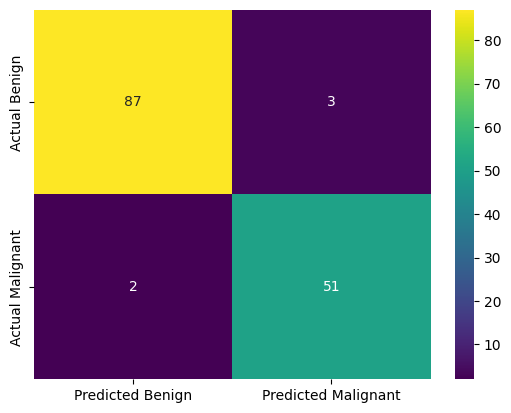

In [269]:
# processed data
y_pred = linear_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

# pca
#y_pred = linear_model.predict(X_test_pca)
#conf_matrix = confusion_matrix(y_test_pca, y_pred, labels=['B', 'M'])
#cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
#                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
#                             yticklabels=['Actual Benign', 'Actual Malignant'])
#plt.show()

## Classification using a neural network

Neural networks have proven to be a good substitute for classification algorithms. In this chapter we consider an artificial neural network with 5 layers.

1. The activation function of the input and hidden layers is ReLU, and of the output layer is sigmoid
2. The loss function used is cross-entropy loss for binary classification
3. Model is trained through 1000 epochs

A problem that can be encountered is overtraining, given that computational complexity is not an issue for the input type of the dataset. Overtraining is prevented by reducing the number of layers. In this example, the simplest possible architecture is used.

In [270]:
import torch
import torch.nn as nn
import torch.optim as optim

#torch.manual_seed(0)

class TumorNet(nn.Module):
    def __init__(self, input_size):
        super(TumorNet, self).__init__()
        self.layer1 = nn.Linear(in_features=input_size, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=8) 
        self.layer3 = nn.Linear(in_features=8, out_features=8)
        self.layer4 = nn.Linear(in_features=8, out_features=6)
        self.output_layer = nn.Linear(in_features=6, out_features=1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.sigmoid(self.output_layer(x))
        return x

    
def train(model, loss_function, optimizer, epochs, X_train, y_train, X_test, y_test, verbose=True):
    # data to tensor
    # training set
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_encoded = np.where(y_train == "M", 1, 0)
    y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.float32)

    # test set
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_encoded = np.where(y_test == "M", 1, 0)
    y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)


    accuracies_train = []
    accuracies_test = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = loss_function(output, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            train_acc = ((output >= 0.5).float() == y_train_tensor).float().mean()
            accuracies_train.append(train_acc)

            test_output = model(X_test_tensor)
            test_acc = ((test_output >= 0.5).float() == y_test_tensor).float().mean()
            accuracies_test.append(test_acc)

        if verbose and (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}, Accuracy: {train_acc.item():.4f}')
            
    return accuracies_train, accuracies_test


def evaluate(model, loss_function, X_test, y_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_encoded = np.where(y_test == "M", 1, 0)
    y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)
    
    with torch.no_grad():
        model.eval()
        test_output = model(X_test_tensor)
        test_loss = loss_function(test_output, y_test_tensor)
        test_acc = ((test_output >= 0.5).float() == y_test_tensor).float().mean()
        
        return test_loss, test_acc

In [284]:
# model, loss function and optimizer init (processed data)
input_size = X_train.shape[1]
model = TumorNet(input_size)
cross_entropy = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("TumorNet training on processed data:")
accuracies_train, accuracies_test = train(model, cross_entropy, optimizer, 1000, X_train, y_train, X_test, y_test)

print("\nTumorNet results on test processed data:")
test_loss, test_acc = evaluate(model, cross_entropy, X_test, y_test)
accuracy_table_ts_proc.append(test_acc)
print(f"Loss: {test_loss.item():.4f}\nAccuracy: {test_acc.item():.4f}")

nn_proc_data = model

TumorNet training on processed data:
Epoch [100/1000], Loss: 0.5361, Accuracy: 0.8216
Epoch [200/1000], Loss: 0.2346, Accuracy: 0.9178
Epoch [300/1000], Loss: 0.1694, Accuracy: 0.9413
Epoch [400/1000], Loss: 0.1379, Accuracy: 0.9507
Epoch [500/1000], Loss: 0.1150, Accuracy: 0.9601
Epoch [600/1000], Loss: 0.0974, Accuracy: 0.9671
Epoch [700/1000], Loss: 0.0836, Accuracy: 0.9695
Epoch [800/1000], Loss: 0.0742, Accuracy: 0.9765
Epoch [900/1000], Loss: 0.0677, Accuracy: 0.9789
Epoch [1000/1000], Loss: 0.0633, Accuracy: 0.9859

TumorNet results on test processed data:
Loss: 0.1123
Accuracy: 0.9650


In [285]:
# model, loss function and optimizer init (pca)
input_size = X_train_pca.shape[1]
model = TumorNet(input_size)
cross_entropy = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("TumorNet training on pca data:")
accuracies_train_pca, accuracies_test_pca = train(model, cross_entropy, optimizer, 1000, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

print("\nTumorNet results on test pca data:")
test_loss, test_acc = evaluate(model, cross_entropy, X_test_pca, y_test_pca)
accuracy_table_ts_pca.append(test_acc)
print(f"Loss: {test_loss.item():.4f}\nAccuracy: {test_acc.item():.4f}")

nn_pca_data = model

TumorNet training on pca data:
Epoch [100/1000], Loss: 0.5811, Accuracy: 0.6338
Epoch [200/1000], Loss: 0.1251, Accuracy: 0.9789

TumorNet results on test pca data:
Loss: 0.1544
Accuracy: 0.9720


The graph shows the accuracy of the network on the training and testing set as a function of epoch for both datasets. Accuracy is shown every tenth epoch for readability.

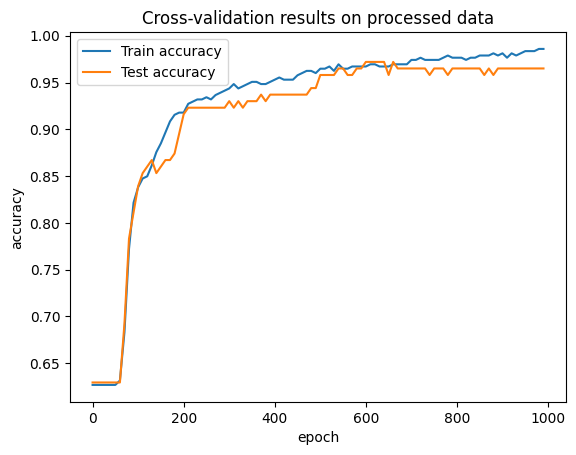

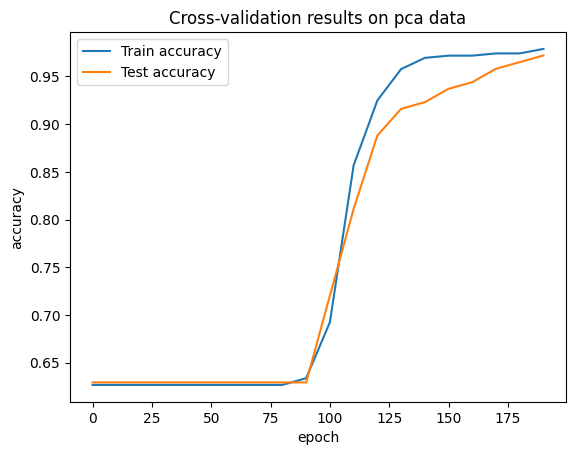

In [286]:
# processed data
plt.plot(np.arange(0, 1000, 10, dtype=int), accuracies_train, label="Train accuracy")
plt.plot(np.arange(0, 1000, 10, dtype=int), accuracies_test, label="Test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Cross-validation results on processed data")
plt.legend()
plt.show()

# pca
plt.plot(np.arange(0, 1000, 10, dtype=int), accuracies_train_pca, label="Train accuracy")
plt.plot(np.arange(0, 1000, 10, dtype=int), accuracies_test_pca, label="Test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Cross-validation results on pca data")
plt.legend()
plt.show()

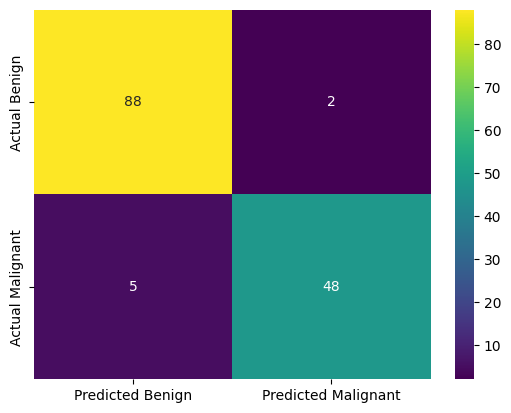

In [274]:
# processed data
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_encoded = np.where(y_test == "M", 1, 0)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)
    
with torch.no_grad():
    nn_proc_data.eval()
    test_output = nn_proc_data(X_test_tensor)

y_pred = np.where((test_output >= 0.5).float().numpy() == 1., "M", "B")
conf_matrix = confusion_matrix(y_test, y_pred, labels=["B", "M"])
cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

# pca
#X_test_tensor_pca = torch.tensor(X_test_pca, dtype=torch.float32)
#y_test_encoded_pca = np.where(y_test_pca == "M", 1, 0)
#y_test_tensor_pca = torch.tensor(y_test_encoded_pca, dtype=torch.float32)
    
#with torch.no_grad():
#    nn_pca_data.eval()
#    test_output = nn_pca_data(X_test_tensor_pca)
    
#y_pred = linear_model.predict(y_test_pca)
#conf_matrix = confusion_matrix(y_test_pca, y_pred, labels=['B', 'M'])
#cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
#                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
#                             yticklabels=['Actual Benign', 'Actual Malignant'])
#plt.show()

## Classification using XGBoost classifier

XGBoost is a powerful and widely used machine learning algorithm. It is particularly effective in solving supervised learning problems for classification tasks. XGBoost is an extension of the **gradient boosting** algorithm and is known for its speed and performance.

In [275]:
from xgboost import XGBClassifier

The **optimize_xgboost** function finds the optimal model with respect to the number of estimators with a fixed tree depth. The classifier implements both L2 and L1 regularization, but since overtraining has not been a problem in any of the algorithms so far, these parameters have not been considered.

In [276]:
def optimize_xgboost(min_estimators, max_estimators, increase, max_depth, subsample, X_train, y_train, X_test, y_test):
    accuracies_test = []
    
    optimal_classifier = None
    optimal_accuracy = 0
    
    y_train_encoded = np.where(y_train == "M", 1, 0)
    y_test_encoded = np.where(y_test == "M", 1, 0)
    
    for estimators in range(min_estimators, max_estimators, increase):
        # train
        classifier = XGBClassifier(n_estimators = estimators, max_depth = max_depth, subsample = subsample)
        classifier.fit(X_train, y_train_encoded)
        
        # test
        y_prediction_test = classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test_encoded, y_prediction_test)
        accuracies_test.append(test_accuracy)
        
        if(test_accuracy > optimal_accuracy):
            optimal_classifier = classifier
            optimal_accuracy = test_accuracy
    
    return optimal_classifier, accuracies_test

Using the given function, the optimal classifier is found for both datasets.

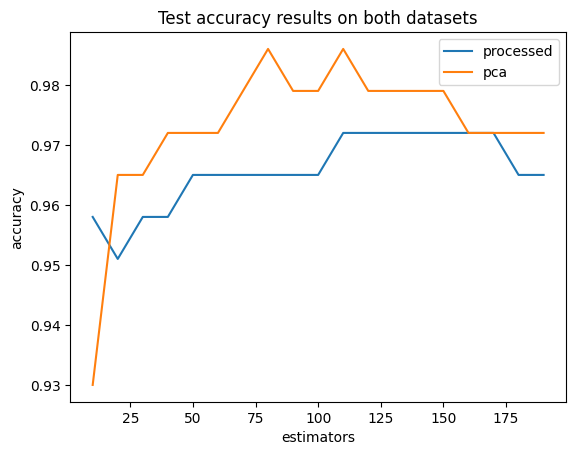

Best classifier on processed data achieved accuracy: 0.972

Best classifier on pca data achieved accuracy: 0.986


In [277]:
# normal
classifier, accuracies_test = optimize_xgboost(10, 200, 10, 6, 0.9, X_train, y_train, X_test, y_test)

# pca
classifier_pca, accuracies_test_pca = optimize_xgboost(10, 200, 10, 6, 0.9, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

# plot
plt.plot(list(range(10,200,10)), accuracies_test, label="processed")
plt.plot(list(range(10,200,10)), accuracies_test_pca, label="pca")
plt.xlabel("estimators")
plt.ylabel("accuracy")
plt.title("Test accuracy results on both datasets")
plt.legend()
plt.show()

# normal
y_prediction_test = classifier.predict(X_test)
best_accuracy = round(accuracy_score(np.where(y_test == "M", 1, 0), y_prediction_test), 4)
accuracy_table_ts_proc.append(best_accuracy)
print(f"Best classifier on processed data achieved accuracy: {best_accuracy}\n")


# pca
y_prediction_test = classifier_pca.predict(X_test_pca)
best_accuracy = round(accuracy_score(np.where(y_test_pca == "M", 1, 0), y_prediction_test), 4)
accuracy_table_ts_pca.append(best_accuracy)
print(f"Best classifier on pca data achieved accuracy: {best_accuracy}")

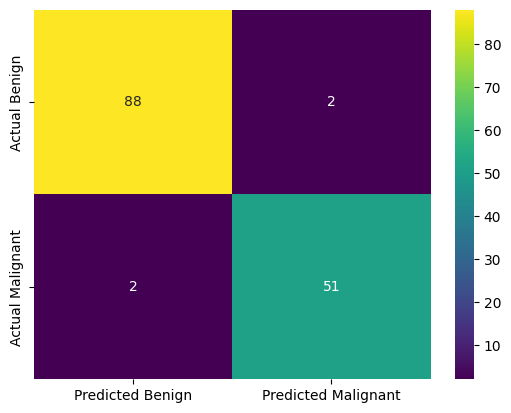

In [278]:
# processed data
y_pred = np.where(classifier.predict(X_test) == 1, "M", "B")
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
                             yticklabels=['Actual Benign', 'Actual Malignant'])
plt.show()

# pca
#y_pred = np.where(classifier.predict(X_test_pca) == 1, "M", "B")
#conf_matrix = confusion_matrix(y_test_pca, y_pred, labels=['B', 'M'])
#cm_heatmap_svm = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
#                             xticklabels=['Predicted Benign', 'Predicted Malignant'],
#                             yticklabels=['Actual Benign', 'Actual Malignant'])
#plt.show()

## Accuracy score comparison table

Finally, the accuracies are compared on the test data for the original paper and for this notebook. The accuracies on both manually processed data and pca data is shown.

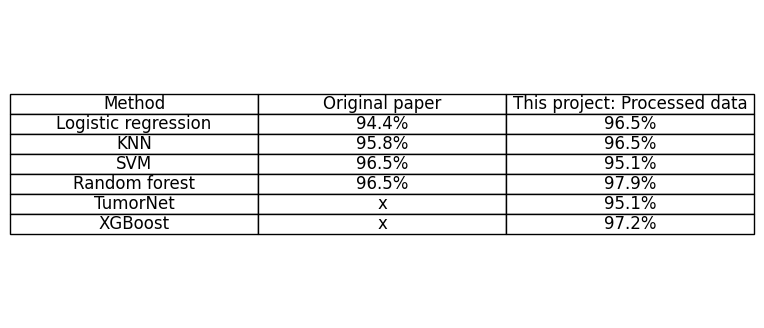

In [280]:
data = {
    "Method": ["Logistic regression", "KNN", "Decision tree", "Random forest", "SVM", "TumorNet", "XGBoost"],
    "Original paper": ["94.4%", "95.8%", "95.1%", "96.5%", "96.5%", "x", "x"],
    "This project: Processed data": [f"{acc * 100:.1f}%" for acc in accuracy_table_ts_proc],
    "This project: Pca data)": [f"{acc * 100:.1f}%" for acc in accuracy_table_ts_pca]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2) 

plt.show()